# Business Understanding

Permasalahan : 

Budi adalah seorang penjual laptop

Saat ini laptop banyak dicari untuk sekolah maupun bekerja

Dari data yang dia punya, Budi ingin mengelompokan laptop berdasarkan spek dan ingin mengetahui laptop mana yang harganya turun dratis serta melihat rating-rating laptop

Tujuan :

Untuk merekomendasikan laptop kepada pelanggan

# Data Understanding

In [ ]:
import pandas as pd # Data Manipulating
from pprint import pprint # membuat fungsi print yang lebih kompleks (list, tuple, dict, dll)
import numpy as np # Support large multi-dimensional array
import matplotlib.pyplot as plt #Basic Plot di Python
import seaborn as sns #plot alternatif dari matplotlib dengan beberapa fitur berebeda
pd.options.mode.chained_assignment = None  # default='warn
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)
from scipy import stats #keperluan perhitungan statistik
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
#Memasukan data drive ke colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data yang ingin di analisa
data_laptop = pd.read_csv("/content/drive/MyDrive/Cleaned_Laptop_data.csv") #Lokasi sesuai data di drive

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Brand            | Merk dari laptop                                                                                       |
| Model          | Seri dari laptop                                                                                         |
| processor_brand        | Merk dari prosessor yang dipakai laptop                                                                               |
| processor_name     | Seri dari prosessor yang dipakai laptop                                                                                         |
| processor_gnrtn     | Generasi dari prosessor                                                                                         |
|ram_gb   | Ukuran RAM laptop                                                                                  |
| ram_type      | Tipe RAM                                                                                   |
| ssd         | Ukuran SSD                                                                              |
| hdd    | Ukuran HDD                                                                      |
| os           | Operating system yang digunakan laptop                                                                                            |
| os_bit     | Bit pada operating system                                                                   |
| graphic_card_gb         | Ukuran VRAM atau Memori pada graphic card                                |
| weight    | Kategori berdasarkan Berat laptop                                                                 |
| display_size | Ukuran layar                                                                              |
| warranty      | Panjang masa garansi                                                                                    |
| Touchscreen  | Apakah layar laptop touchscreen atau tidak                                                                               |
| msoffice       | Apakah laptop bundlin dengan MS Office atau tidak                                                                                                    |
| latest_price           | Harga terbaru                                                                        |
| old_price          | Harga sebelumnya                                                                                        |
| discount  | Total diskon |
| star_rating    | Rating berdasarkan bintang (Skala 0 - 5)                                                            |
| ratings    | Jumlah rating (Count)                                                            |
| reviews    | Jumlah orang yang mereviews                                                            |

In [ ]:
data_laptop.head() #Melihat 5 data teratas

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.80,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.30,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.90,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.40,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.20,116,15


In [ ]:
data_laptop.shape

(896, 23)

In [ ]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
df=data_laptop.iloc[:,18:23] #Melihat kolom terkait data numeric penjualan

In [ ]:
df.describe() #Melihat summary statistic

,old_price,discount,star_rating,ratings,reviews
count,896.00,896.00,896.00,896.00,896.00
mean,88134.15,18.53,2.98,367.39,46.15
std,55719.65,10.51,1.97,1106.31,136.08
min,0.00,0.00,0.00,0.00,0.00
25%,54940.50,11.00,0.00,0.00,0.00
50%,78052.50,19.00,4.10,19.00,3.00
75%,111019.50,26.00,4.40,179.50,23.25
max,377798.00,57.00,5.00,15279.00,1947.00


In [ ]:
data_laptop.isnull().sum()

brand               0
model               0
processor_brand     0
processor_name      1
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size        0
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

In [ ]:
print("number of NaN values for the column processor_name :", data_laptop['processor_name'].isnull().sum())
print("number of NaN values for the column ram_gb :", data_laptop['ram_gb'].isnull().sum())
print("number of NaN values for the column ram_type :", data_laptop['ram_type'].isnull().sum())

number of NaN values for the column processor_name : 1
number of NaN values for the column ram_gb : 25
number of NaN values for the column ram_type : 25


In [ ]:
mask = data_laptop['processor_name'].isnull()
data_laptop[mask]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
52,acer,Aspire,AMD,NaN,Missing,NaN,NaN,0,0,Missing,...,0,0,No,No,54990,89000,38,4.50,3190,414


In [ ]:
data_laptop.loc[52]

brand                 acer
model               Aspire
processor_brand        AMD
processor_name         NaN
processor_gnrtn    Missing
ram_gb                 NaN
ram_type               NaN
ssd                      0
hdd                      0
os                 Missing
os_bit                  32
graphic_card_gb          4
weight              Casual
display_size             0
warranty                 0
Touchscreen             No
msoffice                No
latest_price         54990
old_price            89000
discount                38
star_rating           4.50
ratings               3190
reviews                414
Name: 52, dtype: object

In [ ]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
data_laptop.corr() # syntax `corr` ini Pearson Correlation

,ssd,hdd,os_bit,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
ssd,1.00,-0.46,0.23,0.28,0.20,0.54,0.49,0.11,-0.12,-0.18,-0.18
hdd,-0.46,1.00,-0.01,-0.08,-0.05,-0.23,-0.25,-0.09,0.04,0.06,0.05
os_bit,0.23,-0.01,1.00,-0.14,0.29,-0.06,-0.01,0.04,0.04,-0.04,-0.05
graphic_card_gb,0.28,-0.08,-0.14,1.00,-0.04,0.49,0.46,0.05,-0.01,-0.04,-0.04
warranty,0.20,-0.05,0.29,-0.04,1.00,0.04,0.05,0.07,0.09,0.05,0.03
latest_price,0.54,-0.23,-0.06,0.49,0.04,1.00,0.75,-0.21,-0.16,-0.16,-0.17
old_price,0.49,-0.25,-0.01,0.46,0.05,0.75,1.00,0.22,-0.08,-0.15,-0.16
discount,0.11,-0.09,0.04,0.05,0.07,-0.21,0.22,1.00,0.07,-0.03,-0.03
star_rating,-0.12,0.04,0.04,-0.01,0.09,-0.16,-0.08,0.07,1.00,0.22,0.22
ratings,-0.18,0.06,-0.04,-0.04,0.05,-0.16,-0.15,-0.03,0.22,1.00,0.98


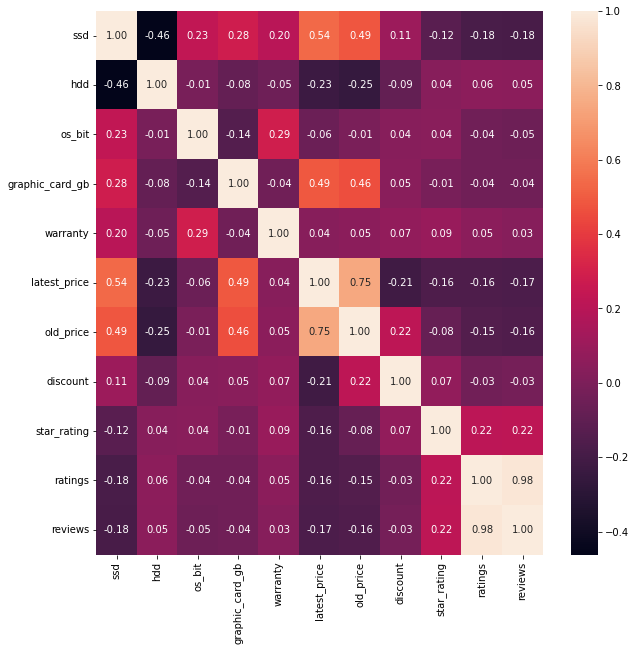

In [ ]:
# Visualisasikan correlation coefficient di atas dengan bantuan heat map
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_laptop.corr(), annot=True, fmt=".2f")
plt.show()

# Data Preparation 

Pada data preparation kita akan membersihkan data

In [ ]:
dlc1 = data_laptop.dropna() #menghapus nilai NaN

data yang sudah dibersihkan dari nilai NaN Budi simpan pada variabel dlc1 (data_laptop_clear_1) data laptop yang sudah dibersihkan pada tahap pertama

In [ ]:
dlc1['model'].replace ('Vivobook', 'VivoBook', inplace = True) #menyatukan Vivobook dengan VivoBook karena pada dasarnya sama hanya beda penulisan

In [ ]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features_clear = dlc1.select_dtypes(include="number").columns.tolist()
categorical_features_clear = dlc1.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features_clear) #menampilkan tulisan dalam list
print("Categorical features:")
pprint(categorical_features_clear, compact=True)

Numerical features:
['ssd',
 'hdd',
 'os_bit',
 'graphic_card_gb',
 'warranty',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews']
Categorical features:
['brand', 'model', 'processor_brand', 'processor_name', 'processor_gnrtn',
 'ram_gb', 'ram_type', 'os', 'weight', 'display_size', 'Touchscreen',
 'msoffice']


In [ ]:
# Dari masing-masing unique values, kita akan coba melihat frequency tiap value di tiap kolom
for feature in categorical_features_clear:
    print(dlc1[feature].value_counts())
    print ('------')

ASUS         251
DELL         151
Lenovo       147
HP           141
acer          51
MSI           45
APPLE         28
Avita         18
Vaio           5
LG             5
ALIENWARE      4
Infinix        4
Nokia          4
realme         4
MICROSOFT      3
RedmiBook      3
Smartron       3
Mi             2
SAMSUNG        1
iball          1
Name: brand, dtype: int64
------
Core          94
VivoBook      89
Inspiron      77
Pavilion      38
IdeaPad       37
              ..
Rog            1
Commercial     1
X390           1
G3             1
v15            1
Name: model, Length: 114, dtype: int64
------
Intel            626
AMD              203
Apple             24
NVIDIA             6
MediaTek           3
Pre-installed      3
First              2
Qualcomm           1
512                1
M.2                1
64                 1
Name: processor_brand, dtype: int64
------
Core i5              292
Core i3              170
Core i7              111
Ryzen 5               82
Ryzen 7             

selanjutnya kita akan menghapus data yang tidak sesuai, seperti layar dengan 0 inci, ukuran RAM yang bukan angka, dan tipe RAM yang masih salah

In [ ]:
dlc1["display_size"] = (dlc1["display_size"].replace({'0': np.nan, 'All' : np.nan, '6th' : np.nan, '8th' : np.nan, 'ITW)' : np.nan}))

In [ ]:
dlc1.isnull().sum()

brand               0
model               0
processor_brand     0
processor_name      0
processor_gnrtn     0
ram_gb              0
ram_type            0
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size       40
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

data display_size yang salah sudah diberi nilai NaN dan berhasil

In [ ]:
dlc_final = dlc1.dropna() #menghapus nilai NaN pada data display_size yang baru diubah

Kemudian dari dlc1, Budi menghilangkan lagi nilai NaN yang baru dimasukan ke display_size. terbentuk lah dlc_final (data_laptop_clear_final) atau data laptop yang sudah final untuk diolah

In [ ]:
dlc_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            831 non-null    object 
 1   model            831 non-null    object 
 2   processor_brand  831 non-null    object 
 3   processor_name   831 non-null    object 
 4   processor_gnrtn  831 non-null    object 
 5   ram_gb           831 non-null    object 
 6   ram_type         831 non-null    object 
 7   ssd              831 non-null    int64  
 8   hdd              831 non-null    int64  
 9   os               831 non-null    object 
 10  os_bit           831 non-null    int64  
 11  graphic_card_gb  831 non-null    int64  
 12  weight           831 non-null    object 
 13  display_size     831 non-null    object 
 14  warranty         831 non-null    int64  
 15  Touchscreen      831 non-null    object 
 16  msoffice         831 non-null    object 
 17  latest_price    

In [ ]:
# Dari masing-masing unique values, kita akan coba melihat frequency tiap value di tiap kolom
for feature in categorical_features_clear:
    print(dlc_final[feature].value_counts())
    print ('------')

ASUS         237
DELL         149
Lenovo       142
HP           134
acer          47
MSI           44
APPLE         28
Avita         17
LG             5
Vaio           5
realme         4
Nokia          4
Infinix        4
MICROSOFT      3
Smartron       3
RedmiBook      3
Mi             2
Name: brand, dtype: int64
------
Core          89
VivoBook      88
Inspiron      77
Pavilion      38
Ryzen         35
              ..
ConceptD       1
3000           1
Rog            1
Commercial     1
v15            1
Name: model, Length: 107, dtype: int64
------
Intel    605
AMD      202
Apple     24
Name: processor_brand, dtype: int64
------
Core i5              292
Core i3              170
Core i7              111
Ryzen 5               82
Ryzen 7               58
Ryzen 9               26
Ryzen 3               26
M1 Processor          18
Pentium Quad          12
Core i9                8
APU Dual               6
Celeron Dual           6
M1 Pro                 5
Hexa Core              2
Dual Core    

Ternyata dengan membersihkan display_size = 0 sudah banyak data yang salah terhapus, sehingga data sudah cukup bersih

In [ ]:
dlc_final["os_bit"] = dlc_final["os_bit"].astype("object") #mengubah bit menjadi objek
dlc_final["ram_gb"] = dlc_final["ram_gb"].astype("int64") #mengubah ukuran menjadi integer

In [ ]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features_clear = dlc_final.select_dtypes(include="number").columns.tolist()
categorical_features_clear = dlc_final.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features_clear, compact=True) #menampilkan tulisan dalam list
print("Categorical features:")
pprint(categorical_features_clear, compact=True)

Numerical features:
['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'warranty', 'latest_price',
 'old_price', 'discount', 'star_rating', 'ratings', 'reviews']
Categorical features:
['brand', 'model', 'processor_brand', 'processor_name', 'processor_gnrtn',
 'ram_type', 'os', 'os_bit', 'weight', 'display_size', 'Touchscreen',
 'msoffice']


In [ ]:
dlc_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            831 non-null    object 
 1   model            831 non-null    object 
 2   processor_brand  831 non-null    object 
 3   processor_name   831 non-null    object 
 4   processor_gnrtn  831 non-null    object 
 5   ram_gb           831 non-null    int64  
 6   ram_type         831 non-null    object 
 7   ssd              831 non-null    int64  
 8   hdd              831 non-null    int64  
 9   os               831 non-null    object 
 10  os_bit           831 non-null    object 
 11  graphic_card_gb  831 non-null    int64  
 12  weight           831 non-null    object 
 13  display_size     831 non-null    object 
 14  warranty         831 non-null    int64  
 15  Touchscreen      831 non-null    object 
 16  msoffice         831 non-null    object 
 17  latest_price    

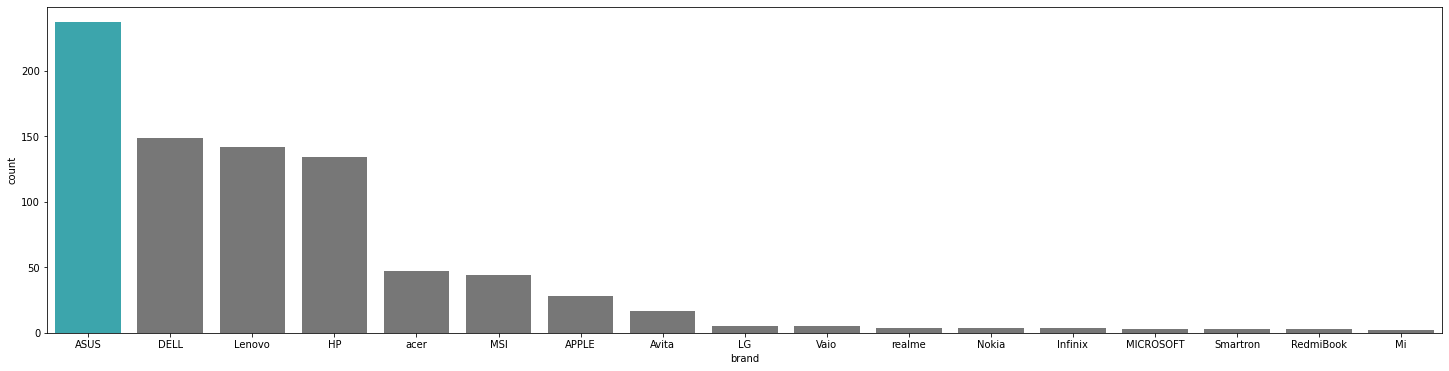

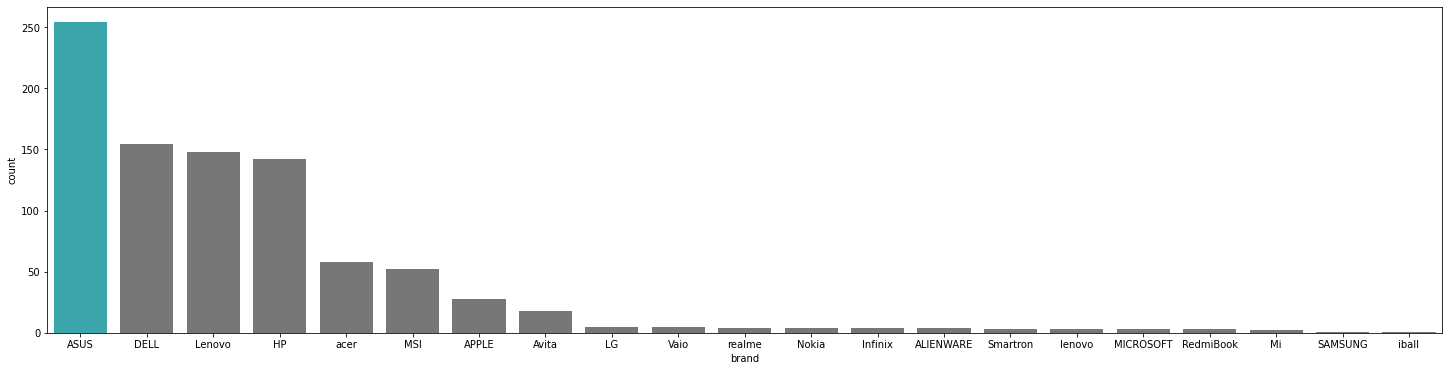

In [ ]:
#data yang sudah dibersihkan
count_clear = dlc_final.brand.value_counts().index

plt.figure(figsize=(25, 6))
sns.countplot(
    x="brand",
    data=dlc_final,
    order=count_clear,
    palette=["#29B5BF"] + (len(count_clear)-1)*["#777777"]
)
plt.grid(False)
plt.show()

#data yang belum bersih
count = data_laptop.brand.value_counts().index

plt.figure(figsize=(25, 6))
sns.countplot(
    x="brand",
    data=data_laptop,
    order=count,
    palette=["#29B5BF"] + (len(count)-1)*["#777777"]
)
plt.grid(False)
plt.show()

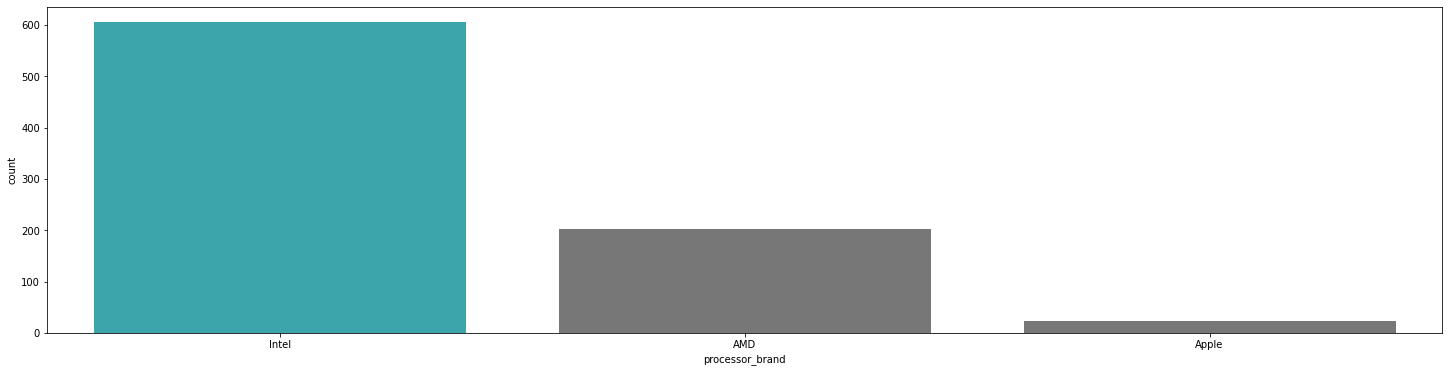

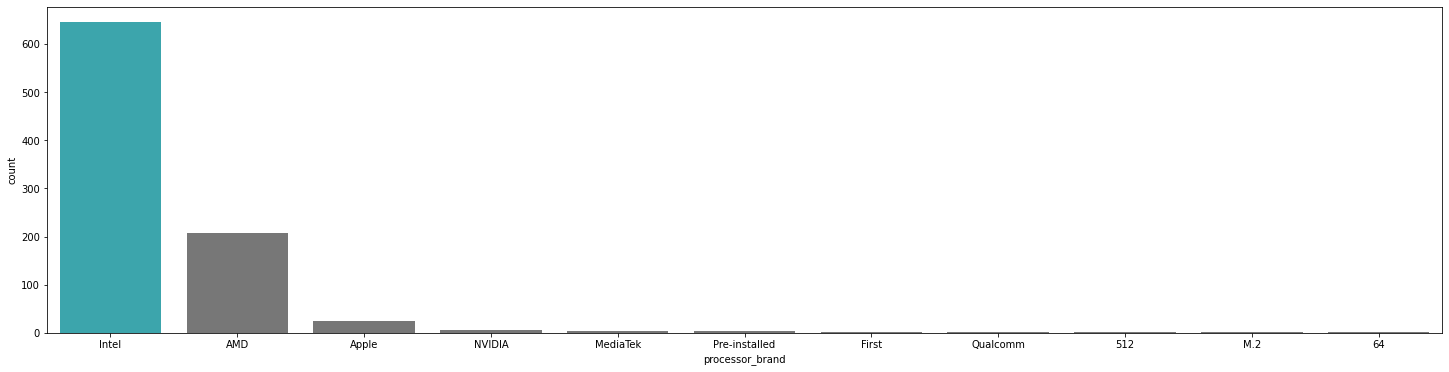

In [ ]:
#data yang sudah dibersihkan
count_clear2 = dlc_final.processor_brand.value_counts().index

plt.figure(figsize=(25, 6))
sns.countplot(
    x="processor_brand",
    data=dlc_final,
    order=count_clear2,
    palette=["#29B5BF"] + (len(count_clear2)-1)*["#777777"]
)
plt.grid(False)
plt.show()


#data yang belum bersih
count2 = data_laptop.processor_brand.value_counts().index

plt.figure(figsize=(25, 6))
sns.countplot(
    x="processor_brand",
    data=data_laptop,
    order=count2,
    palette=["#29B5BF"] + (len(count2)-1)*["#777777"]
)
plt.grid(False)
plt.show()

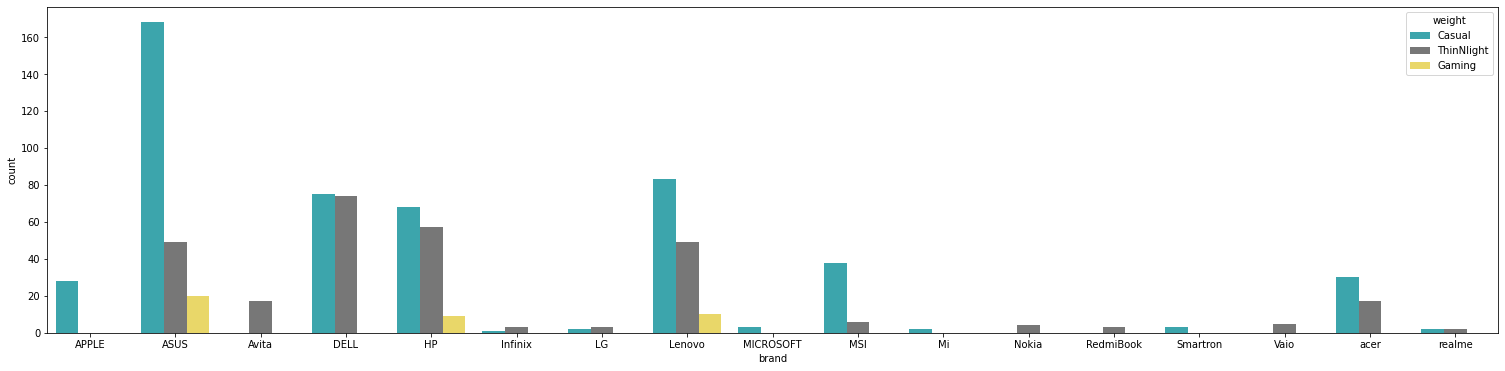

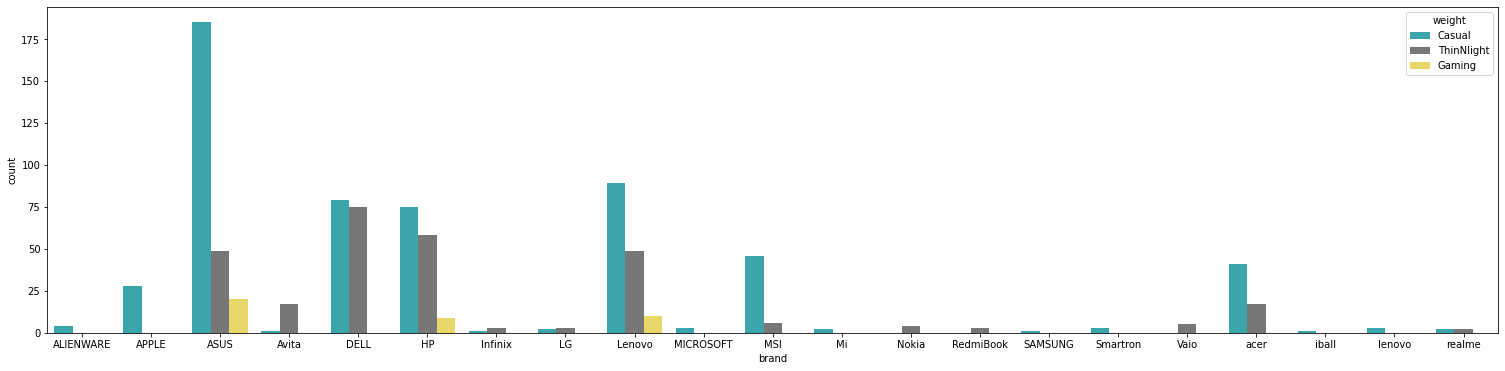

In [ ]:
#data yang sudah dibersihkan
plt.figure(figsize=(26, 6))
sns.countplot(
    x="brand",
    data=dlc_final,
    hue="weight",
    order=sorted(dlc_final.brand.unique()),
    palette=["#29B5BF"] + ["#777777"] +["#FFE653"]
)
plt.grid(False)
plt.show()

#data yang belum bersih
plt.figure(figsize=(26, 6))
sns.countplot(
    x="brand",
    data=data_laptop,
    hue="weight",
    order=sorted(data_laptop.brand.unique()),
    palette=["#29B5BF"] + ["#777777"] +["#FFE653"]
)
plt.grid(False)
plt.show()

## Sekarang Budi akan melakukan visualisasi data numerik

(0.0, 468263.8114526314)

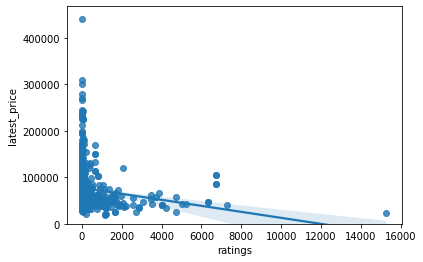

In [ ]:
nih#data baru
sns.regplot(x=dlc_final["ratings"],y=dlc_final["latest_price"])
plt.ylim(0,)

(0.0, 467774.70237137465)

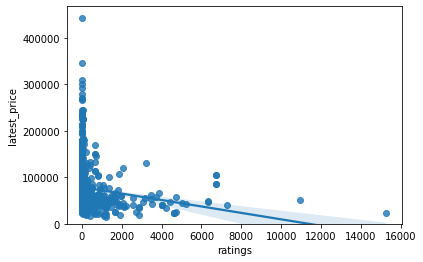

In [ ]:
sns.regplot(x=data_laptop["ratings"],y=data_laptop["latest_price"])
plt.ylim(0,)

Hal yang dapat diperhatikan
1. Ternyata harga dan rating memiliki korelasi negatif, di mana semaking tinggi harga maka rating semakin kecil atau tidak dibeli
2. tidak ada perbedaan yang signifikan setelah data dibersihkan

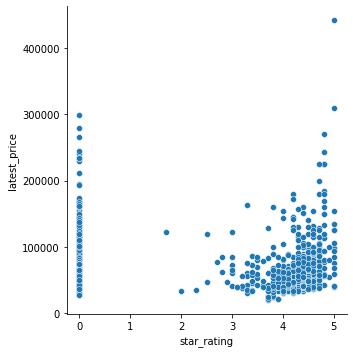

In [ ]:
sns.relplot(x='star_rating', y='latest_price', data=dlc_final) #kita akan melakukan visualisasi terhadap data untuk melihat hubungan antara dua variabel

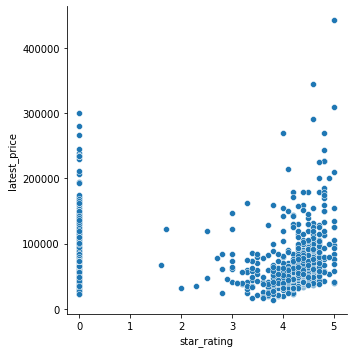

In [ ]:
sns.relplot(x='star_rating', y='latest_price', data=data_laptop) #kita akan melakukan visualisasi terhadap data untuk melihat hubungan antara dua variabel

Hal yang dapat diperhatikan
1. secara kepuasan harga tidak terlalu berpengaruh, dilihat dari gravik di atas di mana bulatan menyebar secara merata
2. tidak ada perbedaan yang signifikan setelah data dibersihkan

In [ ]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
dlc_final.corr() # syntax `corr` ini Pearson Correlation

,ram_gb,ssd,hdd,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
ram_gb,1.00,0.59,-0.26,0.42,0.12,0.70,0.65,0.05,-0.16,-0.18,-0.17
ssd,0.59,1.00,-0.56,0.40,0.10,0.68,0.58,0.09,-0.10,-0.16,-0.15
hdd,-0.26,-0.56,1.00,-0.07,-0.09,-0.25,-0.28,-0.10,0.05,0.08,0.08
graphic_card_gb,0.42,0.40,-0.07,1.00,0.01,0.43,0.44,0.08,-0.05,-0.06,-0.06
warranty,0.12,0.10,-0.09,0.01,1.00,0.07,0.06,0.06,0.13,0.11,0.10
latest_price,0.70,0.68,-0.25,0.43,0.07,1.00,0.73,-0.19,-0.20,-0.15,-0.16
old_price,0.65,0.58,-0.28,0.44,0.06,0.73,1.00,0.25,-0.10,-0.14,-0.14
discount,0.05,0.09,-0.10,0.08,0.06,-0.19,0.25,1.00,0.07,-0.07,-0.05
star_rating,-0.16,-0.10,0.05,-0.05,0.13,-0.20,-0.10,0.07,1.00,0.22,0.22
ratings,-0.18,-0.16,0.08,-0.06,0.11,-0.15,-0.14,-0.07,0.22,1.00,0.98


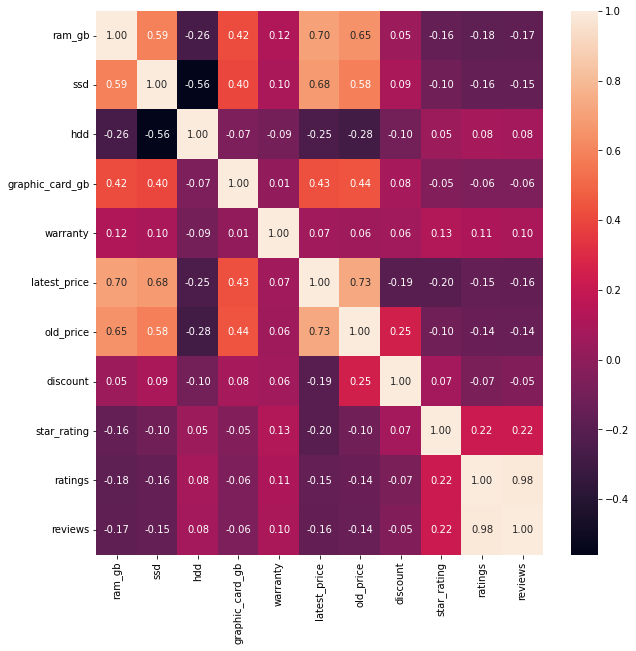

In [ ]:
# Visualisasikan correlation coefficient di atas dengan bantuan heat map
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dlc_final.corr(), annot=True, fmt=".2f", ax=ax )
plt.show()

Memasukan data baru ke csv

In [ ]:
dlc_final.to_csv("data_laptop_new.csv",index=False)

# Modeling 

melihat korelasi dengan latest_price

In [ ]:
dlc_final.corr()['latest_price'].sort_values() # korelasi pearson product moment

hdd               -0.25
star_rating       -0.20
discount          -0.19
reviews           -0.16
ratings           -0.15
warranty           0.07
graphic_card_gb    0.43
ssd                0.68
ram_gb             0.70
old_price          0.73
latest_price       1.00
Name: latest_price, dtype: float64

Kita dapat memakai model linear regression menggunakan fitur 'warranty' dan menghitung R^2.

In [ ]:
X = dlc_final[['warranty']] #independent
Y = dlc_final['latest_price'] #dependent
lm = LinearRegression() #diimport di atas
lm.fit(X,Y)
lm.score(X, Y) #R2 Akurasi

0.004600120411593855

Gunakan model linear regression untuk memprediksi 'latest_price' dengan menggunakan fitur 'graphic_card_gb' kemudian hitung R^2.

In [ ]:
x=dlc_final[['graphic_card_gb']]
y=dlc_final.latest_price
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.18472320114680674

Gunakan model linear regression untuk memprediksi 'price' menggunakan daftar fitur sbb:

In [ ]:
features =["graphic_card_gb", "ssd", 'ram_gb','hdd','warranty', 'discount', 'old_price'] #menyipan semua variabel berhubungan di variabel features

Kemudian hitung R^2.

In [ ]:
x=dlc_final[features]
y=dlc_final.latest_price
lr.fit(x,y)
lr.score(x,y)

0.8025126718623783

>Buatlah list of tuples, dengan elemen pertama dari tuple berisikan nama dari estimator: 
>>'scale'

>>'polynomial'

>>'model'

>Dan elemen kedua dari tuple berisi model constructor

>>StandardScaler()

>>PolynomialFeatures(include_bias=False)

>>LinearRegression()

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Gunakan list tsb untuk membuat pipeline object untuk memprediksi 'price', fit object tsb menggunakan features di dalam list features, dan hitung R^2.

In [ ]:
x=dlc_final[features]
y=dlc_final.latest_price
pipe=Pipeline(Input)
pipe.fit(x,y) #train seluruh data
pipe.score(x,y) #akurasi train

0.9302111403510148

# Evaluation

Import modules yang diperlukan, yaitu:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
print("done")

done


Selanjutnya, data dibagi menjadi training dan testing sets.

In [ ]:
features =["graphic_card_gb", "ssd", 'ram_gb','hdd','warranty', 'discount', 'old_price']    
X = dlc_final[features]
Y = dlc_final['latest_price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 664
number of test samples: 167


Membuat Ridge regression object menggunakan training data, dengan alpha=0.1. Kemudian menghitung R^2 menggunakan test data.

In [ ]:
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.852117770949773

Melakukan transformasi second order polynomial pada training data dan testing data, dengan alpha=0.1. Kemudian menghitung R^2 menggunakan test data.

In [ ]:
pr=PolynomialFeatures(degree=2) 
x_train_pr=pr.fit_transform(x_train) 
x_test_pr=pr.fit_transform(x_test) 

rr=Ridge(alpha=0.1) 
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.94397e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.8664271781827122